In [3]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bi

In [2]:
!pip install opencv-python matplotlib imageio gdown tensorflow

In [2]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

In [6]:
 tf.config.list_physical_devices('GPU')

[]

In [7]:
physical_devices=tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0],True)
except:
    pass

In [2]:
import gdown

In [3]:
url='https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output='data.zip'
gdown.download(url,output,quiet=False)
gdown.extractall('data.zip')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=d0e93821-4642-4912-87c4-2ea2b51e50a2
To: C:\Users\pavan\LipNet\data.zip
100%|██████████| 423M/423M [04:23<00:00, 1.61MB/s] 


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [3]:
def load_video(path:str) -> List[float]:
    
    cap=cv2.VideoCapture(path)
    frames=[]
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        frame =tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()
    
    mean=tf.math.reduce_mean(frames)
    std=tf.math.reduce_std(tf.cast(frames,tf.float32))
    return tf.cast((frames-mean),tf.float32)/std

In [4]:
vocab=[x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [11]:
vocab

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [6]:
char_to_num(['n','i','c','k'])

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([14,  9,  3, 11], dtype=int64)>

In [7]:
num_to_char([14,9,3,11])

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'n', b'i', b'c', b'k'], dtype=object)>

In [5]:
char_to_num=tf.keras.layers.StringLookup(vocabulary=vocab,oov_token="")
num_to_char=tf.keras.layers.StringLookup(vocabulary=char_to_num.get_vocabulary(),oov_token="",invert=True)

print(f"The vocabulary is: {char_to_num.get_vocabulary()}"
      f"(size ={char_to_num.vocabulary_size()})"
     )

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '](size =40)


In [32]:
def load_alignments(path:str) -> List[str]:
    with open(path,'r') as f:
        lines=f.readlines()
    tokens=[]
    for line in lines:
        line=line.split()
        if line[2]!='sil':
            tokens=[*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [24]:
def load_data(path:str):
    path=bytes.decode(path.numpy())
    file_name=path.split('\\')[-1].split('.')[0]
    video_path=os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path=os.path.join('data','alignments','s1',f'{file_name}.align')
    frames=load_video(video_path)
    alignments=load_alignments(alignment_path)
    
    return frames,alignments

In [35]:
test_path='.\\data\\s1\\bbal6n.mpg'

In [46]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('\\')[-1].split('.')[0]

'bbal6n'

In [48]:
frames, alignments=load_data(tf.convert_to_tensor(test_path))

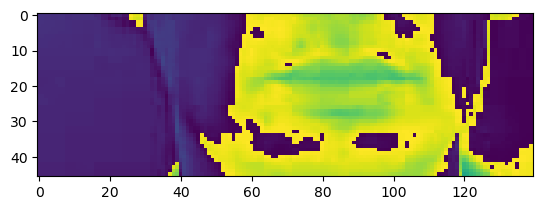

In [49]:
plt.imshow(frames[0])

In [54]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [55]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23], dtype=int64)>

In [56]:
def mappable_function(path:str) ->List[str]:
    result=tf.py_function(load_data, [path],(tf.float32,tf.int64))
    return result

2. DATA PIPELINE

In [83]:
    data=tf.data.Dataset.list_files('./data/s1/*.mpg')
    data=data.shuffle(500)
    data=data.map(mappable_function)
    data=data.padded_batch(2,padded_shapes=([75,None,None,None],[40]))
    data=data.prefetch(tf.data.AUTOTUNE)

In [84]:
frames,alignments =data.as_numpy_iterator().next()

In [86]:
alignments

array([[ 2,  9, 14, 39, 23,  8,  9, 20,  5, 39, 23,  9, 20,  8, 39, 21,
        39, 20, 23, 15, 39, 16, 12,  5,  1, 19,  5,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  9, 14, 39,  7, 18,  5,  5, 14, 39,  9, 14, 39, 14, 39, 20,
        23, 15, 39, 16, 12,  5,  1, 19,  5,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [87]:
frames

array([[[[[1.3911088 ],
          [1.3911088 ],
          [1.3545007 ],
          ...,
          [0.43929753],
          [0.51251376],
          [9.078815  ]],

         [[1.3911088 ],
          [1.3911088 ],
          [1.3545007 ],
          ...,
          [0.18304063],
          [9.3350725 ],
          [8.529694  ]],

         [[1.3911088 ],
          [1.3911088 ],
          [1.3911088 ],
          ...,
          [8.859166  ],
          [9.261856  ],
          [9.225247  ]],

         ...,

         [[0.91520315],
          [0.91520315],
          [0.91520315],
          ...,
          [0.07321625],
          [0.03660813],
          [9.3350725 ]],

         [[0.91520315],
          [0.91520315],
          [0.91520315],
          ...,
          [9.261856  ],
          [9.225247  ],
          [9.18864   ]],

         [[0.91520315],
          [0.91520315],
          [0.91520315],
          ...,
          [9.298464  ],
          [9.18864   ],
          [9.115423  ]]],


        [[[1.3178

In [88]:
len(frames)

2

In [89]:
test=data.as_numpy_iterator()

In [90]:
val=test.next(); val[0]

array([[[[[1.0894324 ],
          [1.014299  ],
          [1.2021322 ],
          ...,
          [0.30053306],
          [0.22539979],
          [0.22539979]],

         [[1.3899654 ],
          [1.2021322 ],
          [1.2772655 ],
          ...,
          [0.30053306],
          [0.22539979],
          [0.22539979]],

         [[1.7280651 ],
          [1.3148321 ],
          [1.0518657 ],
          ...,
          [0.30053306],
          [0.22539979],
          [0.22539979]],

         ...,

         [[0.97673243],
          [0.97673243],
          [0.97673243],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],

         [[0.93916583],
          [0.93916583],
          [0.93916583],
          ...,
          [9.579492  ],
          [9.579492  ],
          [9.579492  ]],

         [[0.93916583],
          [0.93916583],
          [0.93916583],
          ...,
          [9.579492  ],
          [9.579492  ],
          [9.579492  ]]],


        [[[1.1645

In [91]:
imageio.mimsave('./animation.gif',val[0][1],fps=10)

Lossy conversion from float32 to uint8. Range [0.0, 9.283164024353027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.283164024353027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.283164024353027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.283164024353027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.283164024353027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.283164024353027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.283164024353027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. R

Lossy conversion from float32 to uint8. Range [0.0, 9.283164024353027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.283164024353027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.283164024353027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.283164024353027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.283164024353027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.283164024353027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.283164024353027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. R

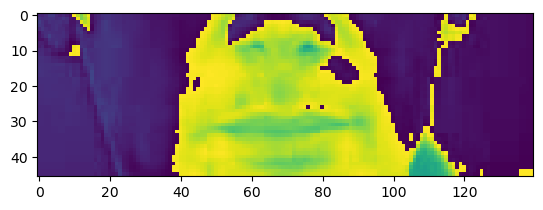

In [92]:
plt.imshow(val[0][0][0])

In [93]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin red with n two please'>

3. design the deep neural network

In [ ]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D,LSTM,Dense,Dropout,Bidirection
from tensorflow.keras.optimizers import Adam